In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
file_p = Path('Resources/lending_data.csv')

In [3]:
# Import the data
df = pd.read_csv(file_p)

In [4]:
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


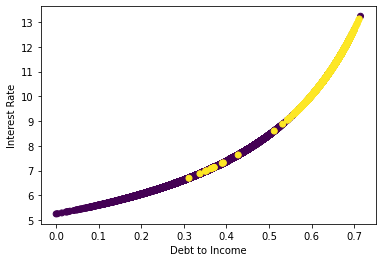

In [23]:
import matplotlib.pyplot as plt

plt.scatter(x=df["debt_to_income"], y=df['interest_rate'], c=df['loan_status'])
plt.xlabel('Debt to Income')
plt.ylabel('Interest Rate')
plt.show()

## Initial Thoughts

* Since this is a binary classification problem Logistic regression may perfrom better
* This data doesn't have too many features and data set is big with 77K rows which also suggests that Logistic regression will perfrom better

In [5]:
# split data into X and y(target)

X = df.drop(columns='loan_status', axis=1)
y = df['loan_status']

In [6]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=3)


In [7]:
# apply standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

## Logistic Regression Model

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled_train, y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(X_scaled_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18763
           1       0.87      0.97      0.92       621

    accuracy                           0.99     19384
   macro avg       0.93      0.98      0.96     19384
weighted avg       0.99      0.99      0.99     19384



In [10]:
print(f"Training Data Score: {model.score(X_scaled_train, y_train)}")
print(f"Testing Data Score: {model.score(X_scaled_test, y_test)}")

Training Data Score: 0.9940156830375567
Testing Data Score: 0.9944799834915394


## Random Forest Model

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=3, n_estimators=50).fit(X_scaled_train, y_train)

y_pred = rfc.predict(X_scaled_test)
print(classification_report(y_test, y_pred))

print(f'Training Score: {rfc.score(X_scaled_train, y_train)}')
print(f'Testing Score: {rfc.score(X_scaled_test, y_test)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18763
           1       0.87      0.88      0.88       621

    accuracy                           0.99     19384
   macro avg       0.93      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384

Training Score: 0.9970250378318889
Testing Score: 0.9921584812216261


## Model Analysis

* Logistic regression model performed better than random forest model on testing data set, even though the later perfromed better on the training data set. 

* This indeed aligns with my prediction that Logistic regression will performed better 